In [1]:
#Импортируем созданный модуль
import f2 as zz

In [2]:
#создаем базу данных и табличку в ней
zz.create_table ('database.db', 'apples')

In [3]:
# Это просто не мог понять почему в следующем шаге ругалось на некорректный тип данных, поэтому выводил на экран инсерты что бы разобраться
import csv
def csv_to_insert(csv_file, table_name):
    insert_statements = []

    with open(csv_file, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)  # Чтение заголовков (первой строки)

        for row in reader:
            # Формируем строку значений для SQL-запроса
            values = ', '.join(f"'{value}'" if isinstance(value, str) else str(value) for value in row)
            insert_statement = f"INSERT INTO {table_name} ({', '.join(headers)}) VALUES ({values});"
            insert_statements.append(insert_statement)

    return insert_statements


csv_file_path = 'apple_quality.csv'
table_name = 'apples'

insert_queries = csv_to_insert(csv_file_path, table_name)

print(insert_queries)


["INSERT INTO apples (A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity, Quality) VALUES ('0', '-3.970048523', '-2.512336381', '5.346329613', '-1.012008712', '1.844900361', '0.329839797', '-0.491590483', 'good');", "INSERT INTO apples (A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity, Quality) VALUES ('1', '-1.195217191', '-2.839256528', '3.664058758', '1.588232309', '0.853285795', '0.867530082', '-0.722809367', 'good');", "INSERT INTO apples (A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity, Quality) VALUES ('2', '-0.292023862', '-1.351281995', '-1.738429162', '-0.342615928', '2.838635512', '-0.038033328', '2.621636473', 'bad');", "INSERT INTO apples (A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity, Quality) VALUES ('3', '-0.657195773', '-2.271626609', '1.324873847', '-0.097874716', '3.637970491', '-3.413761338', '0.790723217', 'good');", "INSERT INTO apples (A_id, Size, Weight, Sweetness, 

In [4]:
# Импортируем данные из уже исправленного CSV
csv_file_path = 'apple_quality.csv'
db_file_path = 'database.db'
table_name = 'apples'

zz.import_csv_to_sqlite(csv_file_path, db_file_path, table_name)

print("Данные успешно импортированы!")

Данные успешно импортированы!


In [5]:
# Ну и немного запросов, посмотрим на данные
import sqlite3
conn = sqlite3.connect('database.db')
cursor = conn.cursor()

cursor.execute("SELECT Weight, size, Sweetness, Crunchiness, Juiciness, Ripeness  FROM apples where Quality = 'good' order by a_id asc LIMIT 100 ")
output = cursor.fetchall()
for outputs in output:
    print(outputs)

(-2.512336381, -3.970048523, 5.346329613, -1.012008712, 1.844900361, 0.329839797)
(-2.839256528, -1.195217191, 3.664058758, 1.588232309, 0.853285795, 0.867530082)
(-2.271626609, -0.657195773, 1.324873847, -0.097874716, 3.637970491, -3.413761338)
(-1.296611877, 1.36421682, -0.384658206, -0.55300577, 3.030874354, -1.303849429)
(1.635955715, 1.331605736, 0.875974244, -1.67779794, 3.106344455, -1.847416733)
(-0.42895848, -1.995462096, 1.530643583, -0.742971676, 0.158834003, 0.974437858)
(-0.564177407, 2.450959845, -1.635040727, 0.942399869, -2.08731667, 1.214321691)
(-1.623701121, -1.345530536, 2.044143754, 1.754812932, 0.997567093, 0.434179855)
(-0.344798192, 2.839580937, -1.019797291, 0.894580857, -1.300060883, 0.58237862)
(-2.795684208, -2.659887385, 4.230403587, 0.697550395, 2.180911101, -0.088775396)
(-4.714749953, -0.074370177, 0.249767641, 2.935319065, 1.4097551, -2.643810206)
(0.356467403, -2.108049899, -1.156193279, 4.326722517, 1.561543116, -4.630174264)
(-0.721654493, 1.17759278

In [6]:
# А теперь надо построить график на основании данных из БД, для этого необходимо вытянуть данные другим способом
dataframe = zz.fetch_data_as_dataframe()
print(dataframe)

        Weight      Size  Sweetness  Crunchiness  Juiciness  Ripeness
0    -2.512336 -3.970049   5.346330    -1.012009   1.844900  0.329840
1    -2.839257 -1.195217   3.664059     1.588232   0.853286  0.867530
2    -1.351282 -0.292024  -1.738429    -0.342616   2.838636 -0.038033
3    -2.271627 -0.657196   1.324874    -0.097875   3.637970 -3.413761
4    -1.296612  1.364217  -0.384658    -0.553006   3.030874 -1.303849
...        ...       ...        ...          ...        ...       ...
3995 -1.067408  0.059386  -3.714549     0.473052   1.697986  2.244055
3996  1.949253 -0.293118  -0.204020    -0.640196   0.024523 -1.087900
3997 -2.138247 -2.634515  -2.440461     0.657223   2.199709  4.763859
3998 -1.779337 -4.008004   2.366397    -0.200329   2.161435  0.214488
3999 -1.715505  0.278540   0.121217    -1.154075   1.266677 -0.776571

[4000 rows x 6 columns]


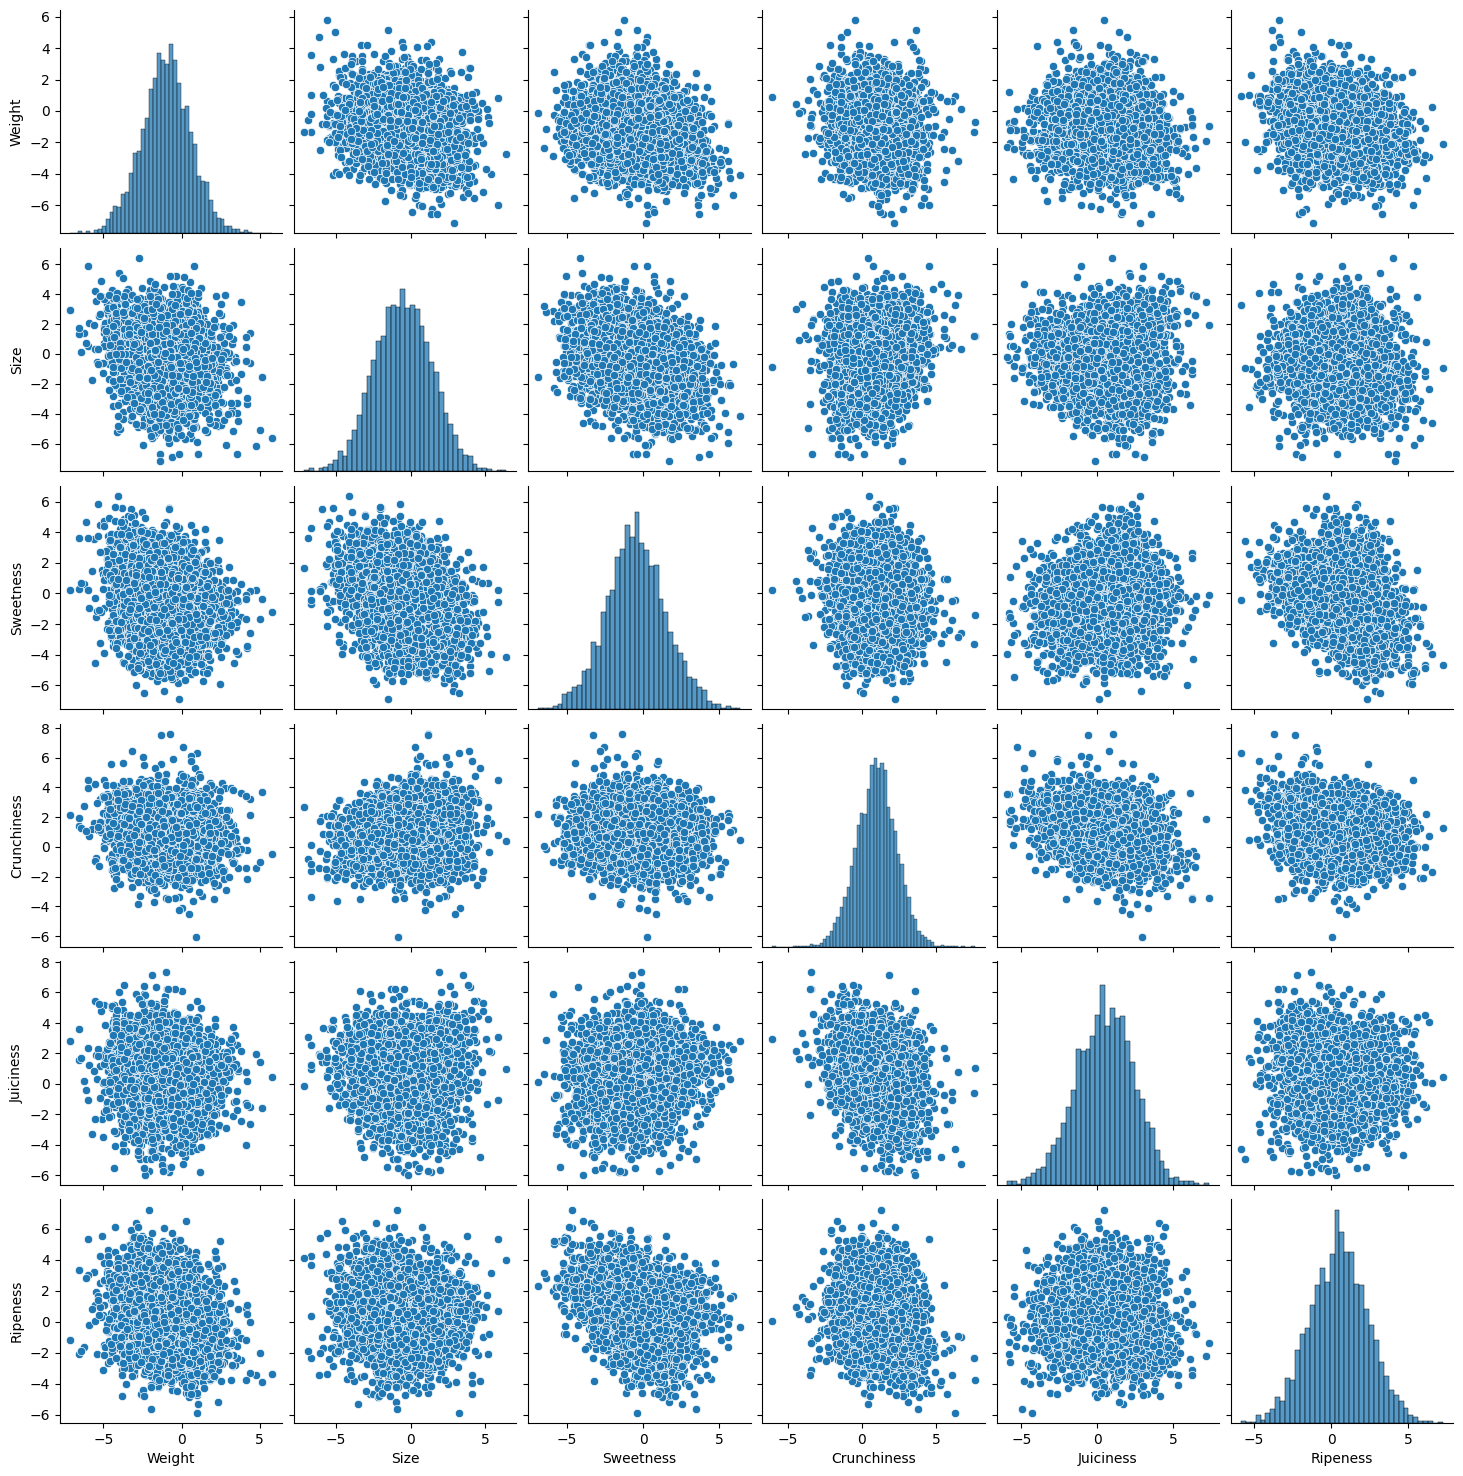

In [7]:
# Построим график
zz.viev(dataframe)

In [8]:
# Немного дополнительной аналитики, посмотрим сколько допускается повреждений у яблок категории "плохой" и "хороший"
cursor.execute("SELECT max(Ripeness), Quality FROM apples group by Quality")
output = cursor.fetchall()
for outputs in output:
    print(outputs)

(7.237836684, 'bad')
(5.553256265, 'good')


In [9]:
# Оценим на сколько у нас одинаково количество данных по категориям
cursor.execute("SELECT count(1), Quality FROM apples group by Quality")
output = cursor.fetchall()
for outputs in output:
    print(outputs)

(1996, 'bad')
(2004, 'good')


In [10]:
# Закроем соединение
conn.close()